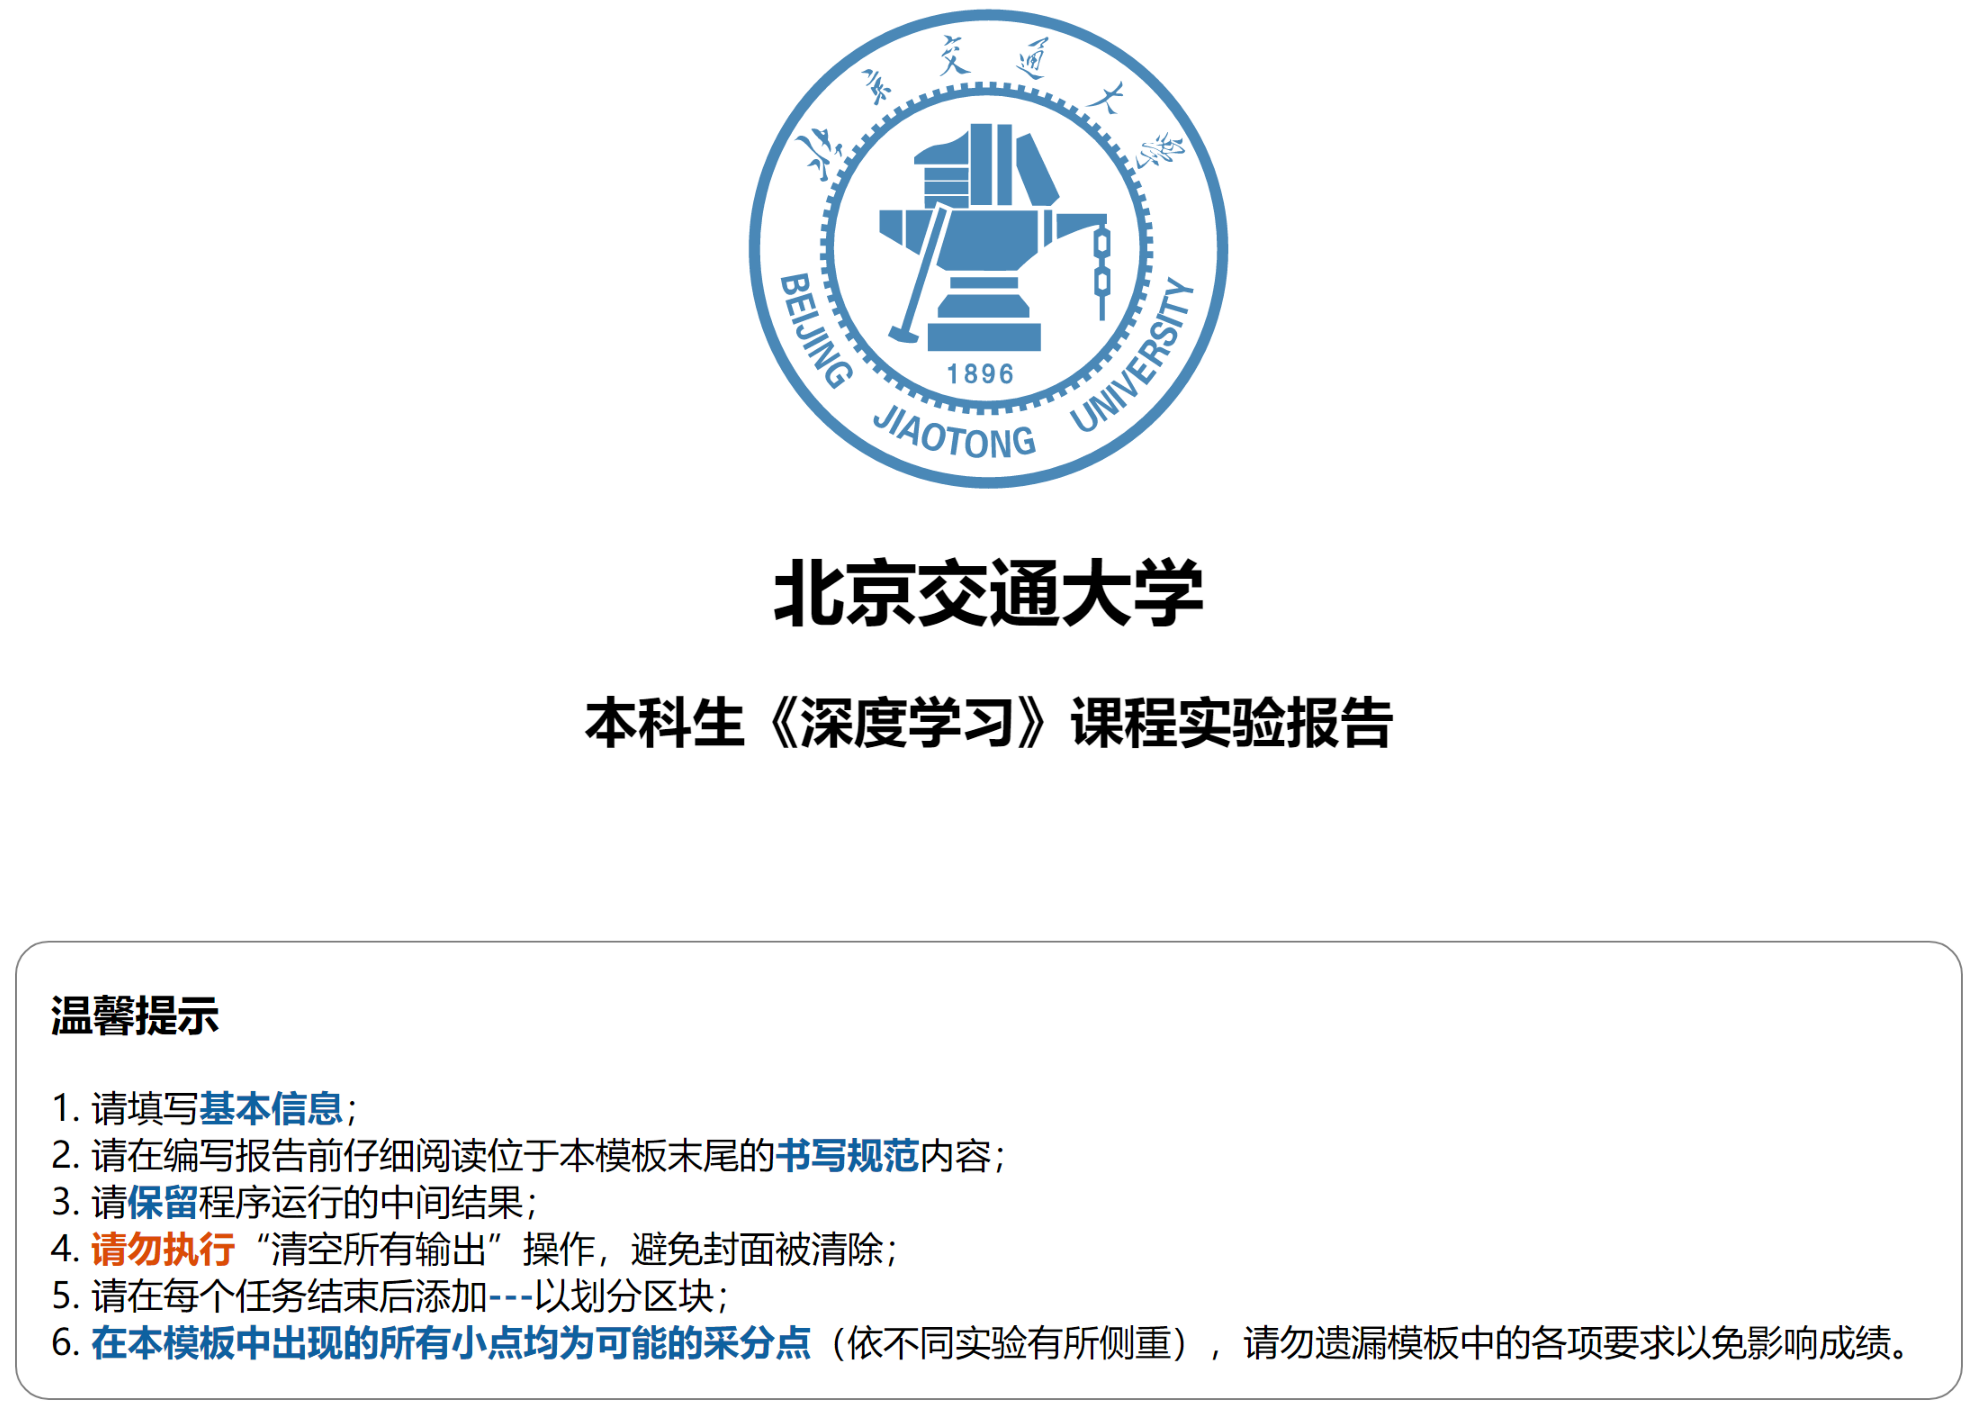

# 基本信息
1. 实验名称：Pytorch基本操作
2. 姓名：
3. 学号：
4. 日期：2022/10/6

---

# 一、Pytorch基本操作考察

## 1.1 任务内容
   1. 使用 <font color='red'>Tensor</font> 初始化一个**1 x 3**的矩阵 $M$ 和一个 **2 × 1** 的矩阵 $N$，对两矩阵进行减法操作（要求实现三种不同的形式），给出结果并分析三种方式的不同（如果出现报错，分析报错的原因），同时需要指出在计算过程中发生了什么。      
   2. ① 利用 <font color='red'>Tensor</font> 创建两个大小分别**3 x 2**和 **4 x 2** 的随机数矩阵 $P$ 和 $Q$ ，要求服从均值为0，标准差0.01为的正态分布；② 对第二步得到的矩阵 $Q$ 进行形状变换得到 $Q$ 的转置 $Q^T$ ；③ 对上述得到的矩阵 $P$ 和矩阵 $Q^T$ 求矩阵相乘    
   3. 给定公式 $y_3 = y_1 + y_2 = x^2 + x^3$,且$x = 1$。利用学习所得到的Tensor的相关知识，求$y_3$对$x$的梯度，即$\frac{dy_3}{dx}$要求在计算的过程中，在计算$x^3$时中断梯度的追踪，观察结果并进行原因分析。  

## 1.2 任务思路及代码  
  
    1. 构造人工数据集
    2. 构造dataloader
    3. 根据函数实现logistics模型
    4. 从dataloader中读取数据并训练模型

## 1.3 实验1

In [6]:
import torch

m = torch.arange(4,7).view(1,3)
n = torch.arange(1,3).view(2,1)
print('M:', m, '\nN:', n )
m_n = m - n
print('减法1:', m_n)
print('减法2:', m.subtract(n))

M: tensor([[4, 5, 6]]) 
N: tensor([[1],
        [2]])
减法1: tensor([[3, 4, 5],
        [2, 3, 4]])
减法2: tensor([[3, 4, 5],
        [2, 3, 4]])


In [7]:
m.sub_(n)
print(m)

RuntimeError: output with shape [1, 3] doesn't match the broadcast shape [2, 3]

### 1.3.1实验结果分析

1. 前两种减法方式  **\-** 和 **sub** 由于两个矩阵的shaope不匹配则会自动触发广播机制，**m=m.repeat(2,1)**。此时m变为**tensor[[4,5,6],[4,5,6]]** **n=n.repeat(1,3)** 此时n变为**tensor[[1,1,1],[2,2,2]]**,之后便可以进行对位相减操作。
2. 第三种方法不会触发广播机制，所以会报错显示shape不匹配。  


## 1.4 实验2

In [3]:
P = torch.normal(mean=0, std=0.01, size=[3,2])
Q = torch.normal(mean=0, std=0.01, size=[4,2])
Q_T = Q.t()
print(torch.mm(P,Q_T))

tensor([[ 8.2229e-06,  7.3925e-06, -1.2496e-05,  1.7892e-05],
        [ 6.1172e-05,  4.5944e-05, -3.5777e-05,  1.0136e-04],
        [-6.6844e-05, -4.2414e-05, -1.0137e-05, -8.3430e-05]])


## 1.5 实验3

In [4]:
import torch
x = torch.tensor(1, requires_grad = True, dtype=torch.float32)
print(x)
print(x.grad)

y1 = x ** 2
with torch.no_grad():  #中止对x3的追踪
    y2 = x ** 3

y3 = y1 + y2
y3.backward()
print(x.grad)


tensor(1., requires_grad=True)
None
tensor(2.)


### 1.5.1 结果分析
根据求导法则可以得到$y_3` = 2x + 3x^2$，但是因为x3中断了追踪，所以当x = 1时，y3对x的梯度为2x=2.0

---

# 二、动手实现 logistic 回归

## 2.1 任务内容

1. 任务具体要求:  
    1.1 要求动手从0实现 logistic 回归（只借助Tensor和Numpy相关的库）在人工构造的数据集上进行训练和测试，并从loss以及训练集上的准确率等多个角度对结果进行分析
    2.1 利用 torch.nn 实现 logistic 回归在人工构造的数据集上进行训练和测试，并对结果进行分析，并从loss以及训练集上的准确率等多个角度对结果进行分析
2. 任务目的  
   学习构建logistic回归，掌握pytorch和numpy的相关知识
3. 任务算法或原理介绍  
   逻辑回归（Logistic Regression）是机器学习中最常见的一种用于二分类的算法模型，通过Sigmoid函数引入了非线性因素，因此可以轻松处理0/1分类问题。  
  
   Sigmoid函数：$$g(z)=\frac{1}{1+e^{-z}}$$
4. 任务所用数据集（若此前已介绍过则可略）  
   人工构造的数据集  
   
## 2.2 任务思路及代码  
    1. 构造人工数据集
    2. 构造dataloader
    3. 根据函数实现logistics模型
    4. 从dataloader中读取数据并训练模型

### 2.2.1 从0实现 logistic 回归

In [24]:
import matplotlib.pyplot as plt

# 定义绘图函数
def figplot(fignum=1,loss=[],acc=[]):
    plt.figure(figsize=(8,3))
    plt.suptitle('Figure '+str(fignum))
    # 打印损失值
    plt.subplot(121)
    plt.ylabel('Loss')
    plt.plot(loss[0],label='Train Loss')
    plt.plot(loss[1],label='Test Loss')
    plt.legend()
    # 打印正确率
    plt.subplot(122)
    plt.ylabel('ACC')
    plt.plot(acc[0],label='Train Acc')
    plt.plot(acc[1],label='Test Acc')
    plt.legend()
    # plt.grid()
    plt.show()

训练集共有数据2000个，其中标签为'0'的数量为 1020， 标签为'1'的数量为 980
测试集共有数据1000个，其中标签为'0'的数量为 489， 标签为'1'的数量为 511
epoch: 1 loss:0.67642 acc: 0.490
epoch: 10 loss:0.59784 acc: 0.796
epoch: 20 loss:0.56183 acc: 0.862
epoch: 30 loss:0.53527 acc: 0.883
epoch: 40 loss:0.51222 acc: 0.899
epoch: 50 loss:0.49160 acc: 0.907
epoch: 60 loss:0.47314 acc: 0.916
epoch: 70 loss:0.45642 acc: 0.924
epoch: 80 loss:0.44129 acc: 0.929
epoch: 90 loss:0.42751 acc: 0.935
epoch: 100 loss:0.41492 acc: 0.941


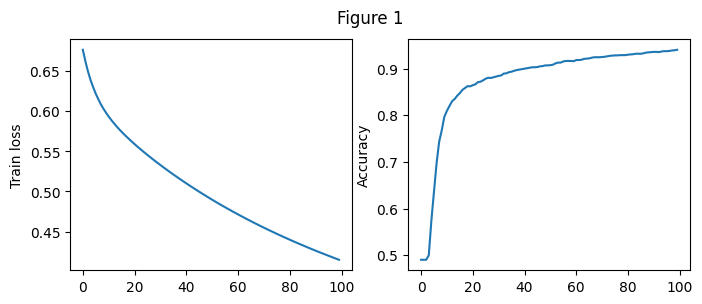

In [10]:
import torch
import numpy as np
import tqdm
from torch.nn import BCELoss
import random
from sklearn.metrics import confusion_matrix #
# 构造人工数据集并进行可视化
def creat_dataes(num_examples,num_inputs):
    features = torch.tensor(np.random.rand(num_examples,num_inputs), dtype=torch.float)
    labels = 1 / (1 + torch.exp(-1*(true_w[0] * features[:, 0] + true_w[1] * features[:, 1]) + true_b)) # 生成标签  
    labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float) # 增加噪声
    num_0, num_1 = 0, 0
    for i in range(num_examples):
        if labels[i] < 0.5:
            labels[i] = 0
            num_0 += 1
        else:
            labels[i] = 1
            num_1 += 1
        labels = labels.view(-1,1)
    return features, labels, num_0, num_1

num_inputs = 2
true_w = [1.9, -3.1]
true_b = -0.6
train_examples,test_examples = 2000, 1000
train_data,train_labels, train_0, train_1 = creat_dataes(train_examples,num_inputs)
test_data, test_labels, test_0, test_1 = creat_dataes(test_examples,num_inputs)
print("训练集共有数据%d个，其中标签为'0'的数量为 %d， 标签为'1'的数量为 %d"%(train_examples,train_0,train_1))
print("测试集共有数据%d个，其中标签为'0'的数量为 %d， 标签为'1'的数量为 %d"%(test_examples,test_0,test_1))
# 定义计算正确率的函数
# 定义读取数据的函数
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield features.index_select(0, j), labels.index_select(0, j) # 返回数据及其标签
        # tensor.index_select(dim, index) 第dim个参数维度中的index位置挑选数据

# logistics模型
w = torch.tensor(np.random.normal(0, 1, (num_inputs, 1)),dtype=torch.float32, requires_grad=True) 
b = torch.tensor([-1],dtype=torch.float32,requires_grad=True)
# print(f'w: {w}\nb: {b}')

# 定义logistic模型
def myLogistic(x, w, b):
    return 1/(1 + torch.exp(-1 * torch.mm(x,w) + b))
# 定义优化函数
def mySGD(params, lr, batchsize):
    for param in params:
        param.data -= lr*param.grad / batchsize

# 训练
model = myLogistic  # logistics模型
criterion = BCELoss()   # 损失函数
lr = 0.6   # 学习率
batchsize = 64 
epochs = 100 #训练轮数
train_all_loss = []
acc_all = []
max_acc = 0
for epoch in range(epochs):
    for data, labels in data_iter(batchsize,train_data,train_labels):
        
        pred = model(data, w, b)
        train_each_loss = criterion(pred, labels)
        train_each_loss.backward() # 反向传播
        mySGD([w,b], lr, batchsize) # 使用小批量随机梯度下降迭代模型参数
        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()  
        # print(train_each_loss)
    labels_pred = model(train_data,w,b)
    train_l = criterion(labels_pred, train_labels.view(-1,1))
    train_all_loss.append(train_l.item())
    labels_pred = torch.tensor(np.where(labels_pred>0.5, 1, 0),dtype=torch.float32)
    acc = (labels_pred==train_labels).sum(0).item() / train_examples
    max_acc = max(acc,max_acc)
    acc_all.append(acc)
    if epoch==0 or (epoch+1) % 10 == 0:
        print('epoch: %d loss:%.5f acc: %.3f'%(epoch+1,train_l.item(), acc))
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.suptitle('Figure 1')
plt.plot(train_all_loss)
plt.ylabel('Train loss')
plt.subplot(122)
plt.ylabel('Accuracy')
plt.plot(acc_all)
plt.show()

In [11]:
# 计算测试集上的损失值和正确率
with torch.no_grad():
    labels_pred_test = model(test_data,w,b)
    test_l =  criterion(labels_pred_test, test_labels.view(-1,1))
    labels_pred_test = torch.tensor(np.where(labels_pred_test>0.5, 1, 0),dtype=torch.float32)
    acc_test = (labels_pred_test==test_labels).sum(0).item() / test_examples
    print('Test_loss: %.5f Test_acc: %.3f'%(test_l, acc_test))

Test_loss: 0.41198 Test_acc: 0.956


## 2.3实验1结果分析
### 2.3.1实验数据说明
1. 训练集样本数2000个，其中标签为'0'的数量为 1020， 标签为'1'的数量为 980
2. 测试集样本数1000个，其中标签为'0'的数量为 489， 标签为'1'的数量为 511
3. 使用的损失函数为BCELoss函数，使用的优化函数为自己编写的SGD函数，学习率为0.6
4. 训练你轮数epoch为100，设置的batchsize大小为64 
### 2.3.2训练集结果分析
我们用记录了模型在每一个Epoch上的损失值和正确率，如上面**Figure 1**所示  
1. 由左图可以看出随着Epoch的增大，测试集上的**损失值逐步减小**，从0.67附近降至0.4附近  
2.随着Epoch的增大，训练集上的**正确率逐步增加**，由**0.490增加至0.941** 

在开始阶段损失值下降较快，正确率增加较快，经过多轮训练之后，损失值继续下降，正确率持续上升，但**幅度明显下降**。
### 2.3.2训练集结果分析
我们用记录了模型在每一个Epoch上的损失值和正确率，如上面**Figure 1**所示  
1. 由左图可以看出随着Epoch的增大，测试集上的**损失值逐步减小**，从0.67附近降至0.4附近  
2.随着Epoch的增大，训练集上的**正确率逐步增加**，由**0.490增加至0.941** 

在开始阶段损失值下降较快，正确率增加较快，经过多轮训练之后，损失值继续下降，正确率持续上升，但**幅度明显下降**。
### 2.3.3 测试集结果分析
使用上述训练好的模型放在测试集上进行测试：  
在测试集上损失值为： Test_loss: 0.41198  
正确率为  Test_acc: 0.956 
说明模型的在解决回归问题上表现良好

## 2.4 利用 torch.nn 实现 logistic 回归

训练集共有数据2000个，其中标签为'0'的数量为 1009， 标签为'1'的数量为 991
测试集共有数据1000个，其中标签为'0'的数量为 509， 标签为'1'的数量为 491
epoch: 1 train loss:24.12047 train acc: 0.504   test loss:11.44022 test acc: 0.509
epoch: 10 train loss:14.84161 train acc: 0.965   test loss:7.16638 test acc: 0.978
epoch: 20 train loss:11.19547 train acc: 0.983   test loss:5.36809 test acc: 0.984
epoch: 30 train loss:9.32707 train acc: 0.988   test loss:4.46493 test acc: 0.992
epoch: 40 train loss:8.19063 train acc: 0.989   test loss:3.91992 test acc: 0.992
epoch: 50 train loss:7.42397 train acc: 0.989   test loss:3.53405 test acc: 0.992
epoch: 60 train loss:6.91634 train acc: 0.988   test loss:3.25128 test acc: 0.991
epoch: 70 train loss:6.50495 train acc: 0.988   test loss:3.04661 test acc: 0.991
epoch: 80 train loss:6.11308 train acc: 0.988   test loss:2.85722 test acc: 0.991
epoch: 90 train loss:5.80659 train acc: 0.988   test loss:2.73020 test acc: 0.991
epoch: 100 train loss:5.65579 train acc: 0.988   test loss:2.60055 test acc: 0.991


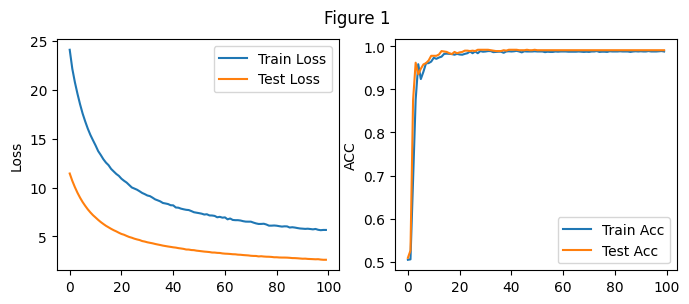

In [23]:
import torch
import torch.nn as nn
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from torch.nn import BCELoss
import random
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import confusion_matrix
# 构造人工数据集并进行可视化
def creat_dataes(num_examples,num_inputs):
    features = torch.tensor(np.random.rand(num_examples,num_inputs), dtype=torch.float)
    labels = 1 / (1 + torch.exp(-1*(true_w[0] * features[:, 0] + true_w[1] * features[:, 1]) + true_b)) # 生成标签  
    labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float) # 增加噪声
    num_0, num_1 = 0, 0
    for i in range(num_examples):
        if labels[i] < 0.5:
            labels[i] = 0
            num_0 += 1
        else:
            labels[i] = 1
            num_1 += 1
        labels = labels.view(-1,1)
    return features, labels, num_0, num_1
num_inputs = 2
true_w = [1.9, -3.1]
true_b = -0.6
train_examples,test_examples = 2000, 1000
train_data,train_labels, train_0, train_1 = creat_dataes(train_examples,num_inputs)
test_data, test_labels, test_0, test_1 = creat_dataes(test_examples,num_inputs)
print("训练集共有数据%d个，其中标签为'0'的数量为 %d， 标签为'1'的数量为 %d"%(train_examples,train_0,train_1))
print("测试集共有数据%d个，其中标签为'0'的数量为 %d， 标签为'1'的数量为 %d"%(test_examples,test_0,test_1))
#模型定义
class myLogistic(nn.Module):  
    def __init__(self,num_examples):  
        super(myLogistic, self).__init__()  
        self.liner = nn.Linear(num_examples, 1)  
        self.s = nn.Sigmoid()  
    
    def forward(self, x): #向前传播
        x = self.liner(x)  
        x = self.s(x)  
        return x  
# 训练
traindataset = TensorDataset(train_data,train_labels)
testdataset = TensorDataset(test_data,test_labels)
traindataloader = DataLoader(dataset=traindataset,batch_size=64,shuffle=True)
testdataloader = DataLoader(dataset=testdataset,batch_size=64,shuffle=True)
model = myLogistic(num_inputs)  # logistics模型
criterion = BCELoss()   # 损失函数
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
epochs = 100 #训练轮数
train_all_loss = []
test_all_loss = []
train_acc_all = []
test_acc_all = []
max_acc = 0
for epoch in range(epochs):
    train_l, train_acc_num = 0, 0
    for data, labels in traindataloader:
        pred = model(data)
        train_each_loss = criterion(pred, labels)
        train_l += train_each_loss.item()
        optimizer.zero_grad()  #梯度清零
        train_each_loss.backward() # 反向传播
        optimizer.step()  # 梯度更新
        labels_pred = torch.tensor(np.where(pred>0.5, 1, 0),dtype=torch.float32)
        train_acc_num += (labels_pred==labels).sum(0).item()
    train_all_loss.append(train_l)
    # max_acc = max(train_acc_num/train_examples,max_acc)
    # print(acc,train_examples)
    train_acc_all.append(train_acc_num/train_examples)  
    
    # 测试集合上测试(将测试集合作为验证集)
    with torch.no_grad():
        loss_all = 0
        acc_num = 0
        for data, labels in testdataloader:
            pred = model(data)
            loss = criterion(pred, labels)
            loss_all += loss.item()
            labels_pred = torch.tensor(np.where(pred>0.5, 1, 0),dtype=torch.float32)
            acc_num += (labels_pred==labels).sum(0).item()
        test_all_loss.append(loss_all)
        test_acc_all.append(acc_num/test_examples)
    if epoch==0 or (epoch+1) % 10 == 0:
        print('epoch: %d train loss:%.5f train acc: %.3f   test loss:%.5f test acc: %.3f'%(
            epoch+1,train_l, train_acc_num/train_examples, loss_all, acc_num/test_examples))
figplot(fignum=1,loss=[train_all_loss,test_all_loss],acc=[train_acc_all,test_acc_all])

## 2.5 实验2结果分析
1. 训练集样本数2000个，其中标签为'0'的数量为 1009， 标签为'1'的数量为 991
2. 测试集样本数1000个，其中标签为'0'的数量为 509， 标签为'1'的数量为 491
3. 使用的损失函数为BCELoss函数，使用的优化函数pytorch提供的SGD函数，学习率为0.1
4. 训练你轮数epoch为100，设置的batchsize大小为64  

记录了模型训练在每一个Epoch上的损失值和正确率，如上面**Figure 1**所示  
1. 由左图可以看出随着Epoch的增大，训练集上的**损失值逐步减小**，从24.12附近降至5.65附近  
2.随着Epoch的增大，训练集上的**正确率逐步增加**，由**0.504增加至0.988** 
在验证集上上的数据如上图**Figure 2**所示

1. 由左图可以看出随着Epoch的增大，测试集上的**损失值逐步减小**，从11.4附近降至2.6附近  
2.随着Epoch的增大，训练集上的**正确率逐步增加**，由**0.509增加至0.991**   

在开始阶段损失值下降较快，正确率增加较快，经过多轮训练之后，损失值继续下降，正确率持续上升，但**幅度明显下降**。


说明模型的在解决回归问题上表现良好

---

  
# 三、动手实现 softmax 回归

## 3.1 任务内容
1. 任务具体要求
    1. 要求动手从0实现 softmax 回归（只借助Tensor和Numpy相关的库）在Fashion-MNIST数据集上进行训练和测试，并从loss、训练集以及测试集上的准确率等多个角度对结果进行分析（要求从零实现交叉熵损失函数）
    2. 利用torch.nn实现 softmax 回归在Fashion-MNIST数据集上进行训练和测试，并从loss，训练集以及测试集上的准确率等多个角度对结果进行分析  
2. 任务目的  
   学习构建softmax回归，掌握pytorch和numpy的相关知识
3. 任务算法或原理介绍  
   softmax在多分类的场景中使用广泛。将一些输入映射为0-1之间的实数，并且归一化保证和为1，实现函数为:   
   
   $$S_i = \frac{e^i}{\sum_je^j}$$

## 3.2 任务思路及代码  
### 3.2.1 数据集介绍
  训练集：60,000, 测试集：10,000，每个样本的数据格式为：28*28*1（高*宽*通道）类别（10类）：dress（连⾐裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）  
### 3.2.2 思路
    1. 加载数据机会
    2. 实现softmax回归模型
    3. 从dataloader中读取数据并训练模型  
## 3.3 动手从0实现 softmax 回归代码

epoch: 1 train train_loss:47142.46484 train acc: 0.748   test train_loss:6303.64489 test acc: 0.699
epoch: 10 train train_loss:26864.52930 train acc: 0.848   test train_loss:4756.91489 test acc: 0.805
epoch: 20 train train_loss:25222.51367 train acc: 0.857   test train_loss:4627.41349 test acc: 0.811
epoch: 30 train train_loss:24482.66602 train acc: 0.859   test train_loss:4493.16258 test acc: 0.818
epoch: 40 train train_loss:23984.51758 train acc: 0.863   test train_loss:4467.52363 test acc: 0.821
epoch: 50 train train_loss:23667.20898 train acc: 0.865   test train_loss:4488.08035 test acc: 0.816
epoch: 60 train train_loss:23446.79883 train acc: 0.866   test train_loss:4496.67373 test acc: 0.823
epoch: 70 train train_loss:23188.85156 train acc: 0.867   test train_loss:4421.94891 test acc: 0.820
epoch: 80 train train_loss:23045.66992 train acc: 0.868   test train_loss:4369.60559 test acc: 0.823
epoch: 90 train train_loss:22881.51562 train acc: 0.868   test train_loss:4374.12941 test ac

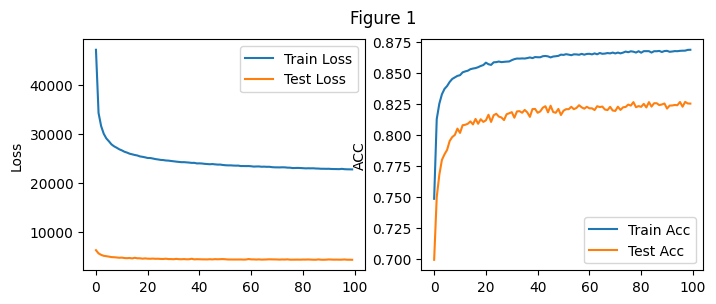

Total Time: 657.0578081607819


In [30]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn
import time
mnist_train = torchvision.datasets.FashionMNIST(root='E:\\DataSet\\FashionMNIST\\Train',
                                                train=True,
                                                download=True,
                                                transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='E:\\DataSet\\FashionMNIST\\Test',
                                               train=False,
                                               download=True,
                                               transform=transforms.ToTensor())
batch_size = 256
train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)
# print(mnist_train.__len__())
# 初始化模型参数
num_inputs = 784  # 输入是28x28像素的图像
num_outputs = 10  # 十分类问题

w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float,
                 requires_grad=True)  # 可学习的权重参数
b = torch.zeros(num_outputs, dtype=torch.float, requires_grad=True)  # 可学习的偏执参数

# 构建softmax
def softmax(x):
    m = x.exp().sum(dim=1, keepdim=True)  # 矩阵同行元素求和
    return x.exp() / m  # 相除

# 模型定义
def model(x):
    return softmax(torch.mm(x.view((-1, num_inputs)), w) + b)

# 定义交叉熵损失函数
def myCrossEntropy(y_pred, y):
    return - torch.log(y_pred.gather(1, y.view(-1, 1)))

# 定义优化函数
def mySGD(params, lr, batchsize):
    for param in params:
        param.data -= lr * param.grad / batchsize
lr = 0.1  # 学习率
epochs = 100  # 训练轮数
# criterion = torch.nn.CrossEntropyLoss()
criterion = myCrossEntropy
train_all_loss = []  # 用于存储训练集上所有的loss值
test_all_loss = []
train_acc_all = []  # 用于记录训练集上每一轮的正确率
test_acc_all = []
max_acc = 0
begin = time.time()
for epoch in range(epochs):
    each_loss, train_acc_num = 0, 0
    for data, labels in train_dataloader:
        pred = model(data)
        train_loss = criterion(pred, labels).sum()
        each_loss += train_loss
        train_loss.backward()  # 反向传播
        mySGD([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
        # 梯度清零
        pred = torch.max(pred, dim=1)[1]
        w.grad.data.zero_()
        b.grad.data.zero_()
        train_acc_num += (pred == labels).sum().item()  # 计算正确率
    train_acc_all.append(train_acc_num / mnist_train.__len__())
    train_all_loss.append(each_loss.item())
    # 在测试集上进行验证
    with torch.no_grad():
        test_loss = 0
        test_acc_num = 0
        for data, labels in test_dataloader:
            pred = model(data)
            loss = criterion(pred, labels).sum()
            test_loss += loss.item()
            labels_pred = torch.tensor(np.where(pred > 0.5, 1, 0), dtype=torch.float32)
            labels_pred = torch.max(labels_pred, dim=1)[1]
            test_acc_num += (labels_pred == labels).sum(0).item()
        test_all_loss.append(test_loss)
        test_acc_all.append(test_acc_num / mnist_test.__len__())
    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('epoch: %d train train_loss:%.5f train acc: %.3f   test train_loss:%.5f test acc: %.3f' % (
            epoch + 1, each_loss, train_acc_num / mnist_train.__len__(), test_loss,
            test_acc_num / mnist_test.__len__()))
end = time.time()
figplot(fignum=1,loss=[train_all_loss,test_all_loss],acc=[train_acc_all,test_acc_all])
print(f'Total Time: {end-begin}')

## 3.4 实验1结果分析  
(注：将测试集作为验证集)  
参数设置：batch_size:256 学习率lr=0.1 训练轮式epochs=100  
所用的总时间为：657.05   
实验结果如上图**Figure 1**从图中能够看出随着训练轮数的增加，训练集和测试集合上的损失值不断下降，正确率不断上升，100轮的训练中其中最好的测试集正确率可以达到0.826

## 3.5利用torch.nn实现 softmax 回归代码

epoch: 1 train train_loss:185.20432 train acc: 0.748   test train_loss:25.47005 test acc: 0.787
epoch: 10 train train_loss:105.11272 train acc: 0.848   test train_loss:20.48063 test acc: 0.817
epoch: 20 train train_loss:98.50819 train acc: 0.857   test train_loss:18.28575 test acc: 0.839
epoch: 30 train train_loss:95.69141 train acc: 0.861   test train_loss:18.28265 test acc: 0.840
epoch: 40 train train_loss:94.08935 train acc: 0.862   test train_loss:17.66965 test acc: 0.844
epoch: 50 train train_loss:92.74614 train acc: 0.864   test train_loss:17.65295 test acc: 0.843
epoch: 60 train train_loss:91.53953 train acc: 0.866   test train_loss:18.06972 test acc: 0.841
epoch: 70 train train_loss:90.80473 train acc: 0.868   test train_loss:18.24120 test acc: 0.836
epoch: 80 train train_loss:90.15075 train acc: 0.867   test train_loss:18.38642 test acc: 0.832
epoch: 90 train train_loss:89.67584 train acc: 0.868   test train_loss:17.67469 test acc: 0.841
epoch: 100 train train_loss:89.00356 tr

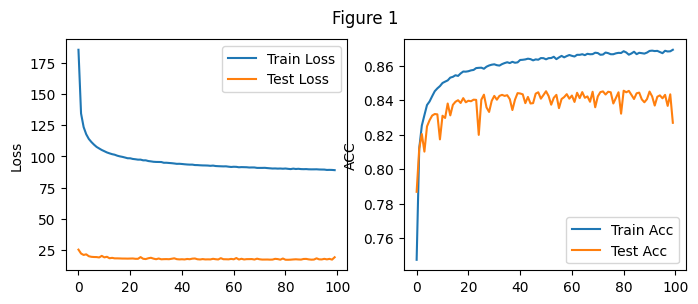

Total Time: 594.8396577835083


In [31]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
import time
mnist_train = torchvision.datasets.FashionMNIST(root='E:\\DataSet\\FashionMNIST\\Train',
                                                train=True,
                                                download=True,
                                                transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='E:\\DataSet\\FashionMNIST\\Test',
                                               train=False,
                                               download=True,
                                               transform=transforms.ToTensor())
batch_size = 256
# 数据装载
train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)
# print(mnist_train.__len__())
# 初始化模型参数
num_inputs = 784  # 输入是28x28像素的图像
num_outputs = 10  # 十分类问题

# 定义模型
class Model(nn.Module):  
    def __init__(self):  
        super(Model, self).__init__()  
        self.linear = torch.nn.Linear(784, 10)  # 十分类问题
    
    def forward(self, x):
        x = x.view(-1, 784)  # -1 代表自动计算 原来为C*1*28*28 现在为C*784
        x = self.linear(x)
        return x
        
lr = 0.1  # 学习率
epochs = 100  # 训练轮数
# criterion = torch.nn.CrossEntropyLoss()
criterion = CrossEntropyLoss()  # 损失函数
model = Model()  # 模型
optim = SGD(model.parameters(),lr=lr)
train_all_loss = []  # 用于存储训练集上所有的loss值
test_all_loss = []
train_acc_all = []  # 用于记录训练集上每一轮的正确率
test_acc_all = []
max_acc = 0
begin = time.time()
for epoch in range(epochs):
    each_loss, train_acc_num = 0, 0
    for data, labels in train_dataloader:
        pred = model(data)   # 进行预测
        train_loss = criterion(pred, labels).sum()  # 计算每一个batch_size上损失值
        each_loss += train_loss  # 计算epoch上的损失值
        optim.zero_grad()  # 梯度清零
        train_loss.backward()  # 反向传播
        optim.step()  # 梯度更新
        pred = torch.max(pred, dim=1)[1] # 获得每组中概率最大的数据的下标，即他的所属列别
        train_acc_num += (pred == labels).sum().item()  # 计算正确率
    train_acc_all.append(train_acc_num / mnist_train.__len__())
    train_all_loss.append(each_loss.item())
    # 在测试集上进行验证
    with torch.no_grad():
        test_loss = 0   # 记录测试集上的损失值
        test_acc_num = 0   #
        for data, labels in test_dataloader:
            pred = model(data)
            loss = criterion(pred, labels)
            test_loss += loss.item()
            pred = torch.max(pred, dim=1)[1]
            test_acc_num += (pred == labels).sum(0).item()
        test_all_loss.append(test_loss)
        test_acc_all.append(test_acc_num / mnist_test.__len__())
    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('epoch: %d train train_loss:%.5f train acc: %.3f   test train_loss:%.5f test acc: %.3f' % (
            epoch + 1, each_loss, train_acc_num / mnist_train.__len__(), test_loss,
            test_acc_num / mnist_test.__len__()))
end = time.time()
figplot(fignum=1,loss=[train_all_loss,test_all_loss],acc=[train_acc_all,test_acc_all])
print(f'Total Time: {end-begin}')

## 3.6 实验1结果分析

实验结果如上图Figure 1所示
(注：将测试集作为验证集)  
参数设置：batch_size:256 学习率lr=0.1 训练轮式epochs=100  
所用的总时间为： 594.83s  
实验结果如上图**Figure 1**从图中能够看出随着训练轮数的增加，训练集和测试集合上的损失值不断下降，正确率不断上升，100轮的训练中其中最好的测试集正确率可以达到0.844.  
与3.4中从零实现的softmax相比，使用的损失函数为torch提供的CrossEntropyLoss, 明显看出两者的损失值大小有较大的出入，可能是内部实现的方式不同。

---

# A1 实验心得
## 1. 模型及损失函数学习
1. 掌握pytorch和numpyl库中相关操作，学会使用画图库matplotlib展示多种图形
2. 掌握构建两种模型结构
    1. Sigmoid函数：$$g(z)=\frac{1}{1+e^{-z}}$$  
    2. softmax模型
       $$S_i = \frac{e^i}{\sum_je^j}$$  
3. 掌握构建优化函数，损失函数，学会前向传播和梯度下降法的相关知识
4. 掌握BCELoss和交叉熵损失函数Cross Entry Loss的实现原理 
5. 掌握基本的代码调试能力，如在本次实验中遇到并解决的问题：
    1. tensor的广播机制
    2. 数据处理时候的shape不匹配问题
    3. 学习率设置不合理导致loss值无法正常下降
   
## 2.函数学习
| 函数 |功能 |
|-|-|
|tensor.gather(dim,index)|返回维度为dim中下标为index的数据 |
|toch.normal((mean, std)|从单独的正态分布中提取的随机数张量|
|torch.max()|返回一组数据中对应维度的最大值及其下标|
|torch.argmax()|返回一组数据中对应维度的最大值下标|